## Use Case 2: Qualitative Reproducibility
In analyzing proteomic data, we compare the proteins present in the different samples. Here we will use two metrics to compare the reproducibility of the data set across replicates and cell types. 

First, we use a Venn diagram approach to show how many proteins from each sample where uniquely identified or shared between the samples. Having many shared proteins among replicates will qualitatively indicate that the samples replicate well. 

Next, we creat PCA (or T-SNE) plots of components 1 and 2. This dimension reduction technique visually demonstrates the similarity or disparity of sub-groups. We use it to show that the cell types are distinct from each other.

In [1]:
from load_data import load_dataset
from plot_utils import reproducibility

### PCA or T-SNE

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

In [3]:
data = load_dataset()

In [4]:
features = np.array(data.index.values) #These are the proteins, the various features we use to distinguish the cell types
samples=np.array(data.columns.values) #These are the different cells; includes cell types
cell_types = ["Inter","Motor"] #Cell types; these strings are in the sample names of those types

In [5]:
standardized_data = pd.DataFrame(StandardScaler().fit_transform(data.values),
                                 columns=samples, index=list(data.index.values))

### Warning: There are missing values; 

In [6]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(standardized_data.dropna().transpose().to_numpy())
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.85575323 0.08136263 0.02624052 0.02035278 0.01629084]


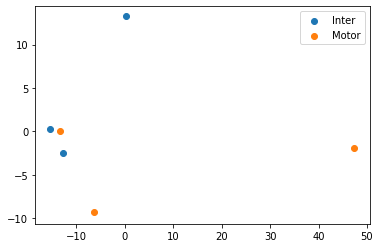

In [7]:
for cell_type in cell_types:
    cells_of_type = list(i for i,s in enumerate(samples) if cell_type in s)
    plt.scatter(pca_result[cells_of_type,0],pca_result[cells_of_type,1])
    
plt.legend(cell_types)
plt.show()

In [8]:
pca_result_df = pd.DataFrame(pca_result, index=samples)
pca_result_df

,0,1,2,3,4
"Abundance: F1: Sample, Inter",0.282812,13.241216,-2.535157,-2.412793,-1.213103
"Abundance: F2: Sample, Inter",-12.688821,-2.471644,-5.278554,5.430066,0.202390
"Abundance: F3: Sample, Inter",-15.284797,0.307882,2.886517,-0.993939,5.899018
"Abundance: F4: Sample, Motor",-6.392413,-9.274215,-2.264573,-5.118227,-1.754142
"Abundance: F5: Sample, Motor",-13.245290,0.071667,6.223705,2.060349,-3.800298
"Abundance: F6: Sample, Motor",47.328508,-1.874905,0.968061,1.034544,0.666136


### Venn Diagram
